In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Переменная $nu$

In [2]:
original = pd.read_csv('c:/Users/gandh/dev/unv/smoed/NB/lab1/data/data2.csv')
var_row = pd.read_csv('c:/Users/gandh/dev/unv/smoed/NB/lab1/data/data4.csv')
var_row.to_csv('data/var_row.csv', index=False)
n = 100
h = 44

In [3]:
int_row = pd.read_csv('c:/Users/gandh/dev/unv/smoed/NB/data/interval.csv')
int_row['cum_sum'] = np.round(np.cumsum(int_row['rf']), 3)
int_row.to_csv('data/int_row.csv', index=False)

In [4]:
usl_mom = int_row.copy()
usl_mom = usl_mom.iloc[:, [1,3]]
usl_mom['u'] = np.arange(-3,4,1)
usl_mom['nu'] = usl_mom['rf']*usl_mom['u']
usl_mom['nu2'] = usl_mom['rf']*pow(usl_mom['u'], 2)
usl_mom['nu3'] = usl_mom['rf']*pow(usl_mom['u'], 3)
usl_mom['nu4'] = usl_mom['rf']*pow(usl_mom['u'], 4)
usl_mom['nu4+'] = usl_mom['rf']*pow(usl_mom['u']+1, 4)
usl_mom

,avg_inter,rf,u,nu,nu2,nu3,nu4,nu4+
0,343,0.04,-3,-0.12,0.36,-1.08,3.24,0.64
1,387,0.09,-2,-0.18,0.36,-0.72,1.44,0.09
2,431,0.27,-1,-0.27,0.27,-0.27,0.27,0.00
3,475,0.35,0,0.00,0.00,0.00,0.00,0.35
4,519,0.17,1,0.17,0.17,0.17,0.17,2.72
5,563,0.06,2,0.12,0.24,0.48,0.96,4.86
6,604,0.02,3,0.06,0.18,0.54,1.62,5.12


In [5]:
usl_mom_f = usl_mom.append(np.round(usl_mom.sum(), 3), ignore_index=True)
usl_mom_f.to_csv('data/usl_mom.csv', index=False)

In [6]:
moms = usl_mom_f.iloc[7, [3,4,5,6]]
checker = moms[3]+4*moms[2]+6*moms[1]+4*moms[0]+1
'True' if checker == usl_mom_f.loc[7, ['nu4+']][0] else 'False'
checker

'True'

13.78

In [7]:
M1 = moms[0]*h+475
m2 = (moms[1] - pow(moms[0],2))*pow(h,2)
m3 = (moms[2] - 3*moms[1]*moms[0] + 2*pow(moms[0],3))*pow(h,3)
m4 = (moms[3] - 4*moms[2]*moms[0] + 6*moms[1]*pow(moms[0],2) - 3*pow(moms[0],4))*pow(h,4)
(M1, m2, m3, m4)

(465.32, 2965.1776, 12053.876735999995, 27651219.62217472)

In [8]:
int_mean = (int_row['avg_inter']*int_row['af']).sum()/n
int_var = (((int_row['avg_inter']-int_mean)**2)*int_row['af']).sum()/n
s = int_var*(n/(n-1))
std_s = np.sqrt(s)
std_var = np.sqrt(int_var)
int_mean
int_var
s
std_s
std_var

465.26

2948.3523999999998

2978.1337373737374

54.57227993563891

54.29873295022638

In [9]:
As = m3/(pow(s, 3))
Ex = (m4/(pow(s, 4))) - 3
As, Ex

(4.563459037863951e-07, -2.999999648490145)

In [10]:
raw_mode = 453+h*(8/26)
raw_median = 453+(((0.5*n)-40)/35)*h
raw_mode
raw_median
int_mean

466.53846153846155

465.57142857142856

465.26

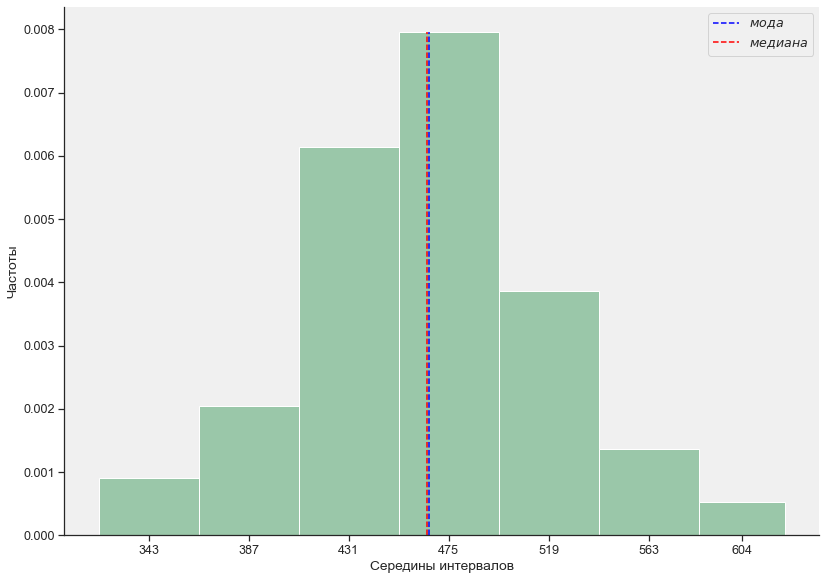

In [11]:
sns.set_theme(palette='crest', font_scale=1.15)
sns.set_style('ticks', {"axes.facecolor": ".94"})
ax = sns.displot(data=original, x='nu', bins=np.array([321, 365, 409, 453, 497, 541, 585, 623]),
                 kind='hist', height=8.27, aspect=11.7/8.27, stat='density')
plt.vlines(raw_mode, 0, int_row.loc[3, 'rf']/h, colors='b', linestyles='--', label='$мода$')
plt.vlines(raw_median, 0, int_row.loc[3, 'rf']/h, colors='r', linestyles='--', label='$медиана$')
# plt.vlines(int_mean, 0, int_row.loc[3, 'rf']/h, colors='k', linestyles='--', label='$x_в$')
ax.set_axis_labels('Середины интервалов', 'Частоты')
ax.set(xticks=int_row['avg_inter'])
plt.legend()
plt.savefig('pics/1.png')

## Переменная $E$

In [12]:
original = pd.read_csv('c:/Users/gandh/dev/unv/smoed/NB/lab1/data2/data2.csv')
var_row = pd.read_csv('c:/Users/gandh/dev/unv/smoed/NB/lab1/data2/data4.csv')
var_row.to_csv('data/var_row2.csv', index=False)
n = 100
h = 16

In [13]:
int_row = pd.read_csv('c:/Users/gandh/dev/unv/smoed/NB/data/interval2.csv')
int_row['cum_sum'] = np.round(np.cumsum(int_row['rf']), 3)
int_row.to_csv('data/int_row2.csv', index=False)
int_row

,inter,avg_inter,af,rf,cum_sum
0,"[84.9, 100.9)",92.9,6,0.06,0.06
1,"[100.9, 116.9)",108.9,14,0.14,0.20
2,"[116.9, 132.9)",124.9,32,0.32,0.52
3,"[132.9, 148.9)",140.9,33,0.33,0.85
4,"[148.9, 164.9)",156.9,9,0.09,0.94
5,"[164.9, 180.9)",172.9,4,0.04,0.98
6,"[180.9, 195.7)",188.3,2,0.02,1.00


In [14]:
usl_mom = int_row.copy()
usl_mom = usl_mom.iloc[:, [1,3]]
usl_mom['u'] = np.arange(-3,4,1)
usl_mom['nu'] = usl_mom['rf']*usl_mom['u']
usl_mom['nu2'] = usl_mom['rf']*pow(usl_mom['u'], 2)
usl_mom['nu3'] = usl_mom['rf']*pow(usl_mom['u'], 3)
usl_mom['nu4'] = usl_mom['rf']*pow(usl_mom['u'], 4)
usl_mom['nu4+'] = usl_mom['rf']*pow(usl_mom['u']+1, 4)
usl_mom

,avg_inter,rf,u,nu,nu2,nu3,nu4,nu4+
0,92.9,0.06,-3,-0.18,0.54,-1.62,4.86,0.96
1,108.9,0.14,-2,-0.28,0.56,-1.12,2.24,0.14
2,124.9,0.32,-1,-0.32,0.32,-0.32,0.32,0.00
3,140.9,0.33,0,0.00,0.00,0.00,0.00,0.33
4,156.9,0.09,1,0.09,0.09,0.09,0.09,1.44
5,172.9,0.04,2,0.08,0.16,0.32,0.64,3.24
6,188.3,0.02,3,0.06,0.18,0.54,1.62,5.12


In [26]:
usl_mom_f = usl_mom.append(np.round(usl_mom.sum(), 3), ignore_index=True)
usl_mom_f.to_csv('data/usl_mom2.csv', index=False)
usl_mom_f

,avg_inter,rf,u,nu,nu2,nu3,nu4,nu4+
0,92.9,0.06,-3.0,-0.18,0.54,-1.62,4.86,0.96
1,108.9,0.14,-2.0,-0.28,0.56,-1.12,2.24,0.14
2,124.9,0.32,-1.0,-0.32,0.32,-0.32,0.32,0.00
3,140.9,0.33,0.0,0.00,0.00,0.00,0.00,0.33
4,156.9,0.09,1.0,0.09,0.09,0.09,0.09,1.44
5,172.9,0.04,2.0,0.08,0.16,0.32,0.64,3.24
6,188.3,0.02,3.0,0.06,0.18,0.54,1.62,5.12
7,985.7,1.00,0.0,-0.55,1.85,-2.11,9.77,11.23


In [27]:
moms = usl_mom_f.iloc[7, [3,4,5,6]]
checker = moms[3]+4*moms[2]+6*moms[1]+4*moms[0]+1
'True' if checker == usl_mom_f.loc[7, ['nu4+']][0] else 'False'
checker

'True'

11.23

In [28]:
M1 = moms[0]*h+140.9
m2 = (moms[1] - pow(moms[0],2))*pow(h,2)
m3 = (moms[2] - 3*moms[1]*moms[0] + 2*pow(moms[0],3))*pow(h,3)
m4 = (moms[3] - 4*moms[2]*moms[0] + 6*moms[1]*pow(moms[0],2) - 3*pow(moms[0],4))*pow(h,4)
M1, m2, m3, m4

(132.1, 396.16, 2497.536000000003, 538131.2511999999)

In [30]:
int_mean = (int_row['avg_inter']*int_row['af']).sum()/n
int_var = (pow((int_row['avg_inter']-int_mean),2)*int_row['af']).sum()/n
s = int_var*(n/(n-1))
std_s = np.sqrt(s)
std_var = np.sqrt(int_var)
int_mean
int_var
s
std_s
std_var

132.08800000000002

394.803856

398.7917737373738

19.969771499378098

19.869671763771038

In [19]:
As = m3/(pow(s, 3))
Ex = (m4/(pow(s, 4))) - 3
As, Ex

(3.937977075311945e-05, -2.999978723340211)

In [32]:
original.mean()

E    132.431
dtype: float64